### Imports

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from sklearn.linear_model import LogisticRegression

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from scipy import stats
from scipy.stats import norm, skew, boxcox
from collections import Counter

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, auc
#from sklearn.metrics import plot_confusion_matrix

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
#from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
#from imblearn.over_sampling import SMOTE

#XGBOOST
#from xgboost import XGBClassifier

#warning
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Load Data

In [4]:
df = pd.read_csv('/Users/gargi/Desktop/DSC_SB/heart_failure_data_analysis/heart_failure/heart_failure_clinical_records_dataset.csv')

In [5]:
df.head().T

,0,1,2,3,4
age,75.0,55.00,65.0,50.0,65.0
anaemia,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0
diabetes,0.0,0.00,0.0,0.0,1.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7
serum_sodium,130.0,136.00,129.0,137.0,116.0
sex,1.0,1.00,1.0,1.0,0.0


In [6]:
X = df.drop("DEATH_EVENT", axis = 1)
y = df.DEATH_EVENT

In [7]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [9]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

train/test-split

In [10]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

### Logistic Regression

In [11]:
#load packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[65  5]
 [23 27]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        70
           1       0.84      0.54      0.66        50

    accuracy                           0.77       120
   macro avg       0.79      0.73      0.74       120
weighted avg       0.78      0.77      0.75       120



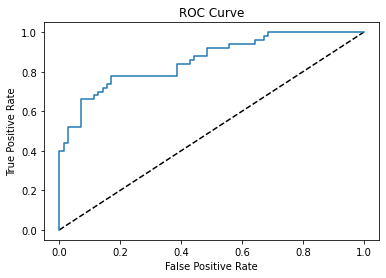

In [13]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [14]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8582857142857143
AUC scores computed using 5-fold cross-validation: [0.9804878  0.98202824 0.99486521 1.         0.99210526]


In [15]:
#define model and parameter
logreg = LogisticRegression()
solvers =['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
#define grid search
grid= dict(solver=solvers, penalty=penalty, C= c_values)
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs= -1, cv = cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f(%f) with:%r"%(mean, stdev, param))

Best: 0.837235 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.829431(0.054017) with:{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.826087(0.062428) with:{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824972(0.058458) with:{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830546(0.056406) with:{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.817168(0.061457) with:{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833891(0.064957) with:{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830546(0.056603) with:{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816054(0.062561) with:{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837235(0.057504) with:{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.830546(0.059669) with:{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821628(0.064093) with:{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833891(0.061956) with:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.829431(0.052930) with:{'C': 0.01, 'penalty': 

### Decision Tree classifier

In [16]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.7324414715719063


### Decision Tree Classifier2

In [17]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.725752508361204


### SVM Model

In [18]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

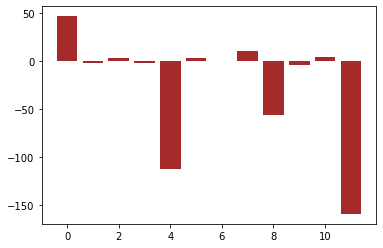

In [19]:
model_svm = SVC(kernel="linear")
model_svm.fit(X_train, y_train)
importance = model_svm.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "brown")
plt.show()

In [20]:
x_train_svm = X_train
x_test_svm = X_test

In [21]:
svm = SVC()
svm.fit(x_train_svm,y_train)
y_pred_svm = svm.predict(x_test_svm)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)
print("SVM Model Cm : ",cm_svm)

RESULT
SVM Model Acc :  0.5833333333333334
SVM Model Cm :  [[70 50]
 [ 0  0]]
